In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_excel('SADCQ.xlsx')

In [3]:
data_dropped=pd.DataFrame(data.drop(['qbikehelmet','qdrivemarijuana','qcelldriving','qpropertydamage','qbullyweight','qbullygender','qbullygay','qchokeself','qcigschool','qchewtobschool','qalcoholschool','qtypealcohol','qhowmarijuana','qmarijuanaschool','qcurrentcocaine','qcurrentheroin','qcurrentmeth','qhallucdrug','qprescription30d','qgenderexp','qtaughtHIV','qtaughtsexed','qtaughtstd','qtaughtcondom','qsportsdrink','qenergydrink','qsugardrink','qwater','qfastfood','qfoodallergy','qtaughtbc','qdietpop','qcoffeetea','sitename','sitecode','sitetype','qwenthungry','qsunscreenuse','qindoortanning','qsunburn','qconcentrating','qcurrentasthma','qwheresleep','qspeakenglish','qtransgender','sitetypenum','year','survyear','PSU','stratum','record'],axis=1))

In [26]:
data_dropped.head()

,weight,age,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,...,q81,q82,q83,q84,q85,q86,q87,q88,q89,qmusclestrength
0,1.3041,5.0,2.0,3.0,1.0,6.0,1.70,52.16,18.048443,10.333861,...,4.0,4.0,4.0,1.0,2.0,1.0,2.0,4.0,2.0,4.0
1,0.2672,5.0,2.0,2.0,2.0,3.0,1.85,104.33,30.483565,97.657096,...,7.0,4.0,1.0,3.0,2.0,2.0,2.0,3.0,3.0,4.0
2,0.7263,5.0,2.0,2.0,4.0,2.0,1.75,44.91,14.664490,0.006242,...,7.0,6.0,1.0,1.0,2.0,5.0,2.0,5.0,7.0,4.0
3,0.3991,5.0,2.0,3.0,4.0,7.0,1.68,58.97,20.893566,50.274471,...,7.0,1.0,1.0,1.0,2.0,5.0,3.0,4.0,2.0,4.0
4,0.3695,5.0,2.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,...,4.0,6.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,8.0


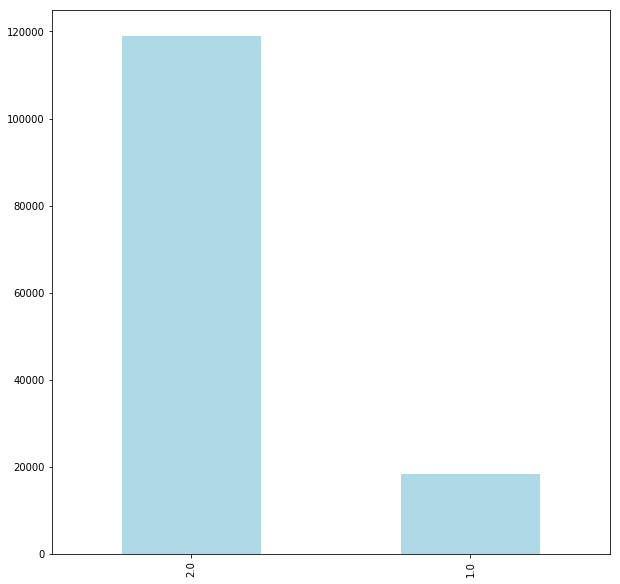

In [5]:
data_dropped['qnobese'].value_counts().plot(kind='bar', color='lightblue',figsize=(10,10))

In [6]:
Y=data_dropped['qnobese'].fillna(1)


In [7]:
X=data_dropped.drop(['qnobese'],axis=1)
X.fillna(X.mean(),inplace=True)

In [8]:
Y.value_counts()

2.0    118906
1.0     84757
Name: qnobese, dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
Y=Y.values

In [11]:
Y=Y.reshape(-1,1)

In [12]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X)
y = scaler.fit_transform(Y)


In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()  
features = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
explained_variance
pca = PCA(n_components=10)  
features = pca.fit_transform(features)


In [16]:
from keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
target = to_categorical(y)

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3)


In [19]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [20]:
target

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(106, activation=tf.nn.relu,
                       input_shape=(xtrain.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(31, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [22]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [23]:
history= model.fit(xtrain, ytrain, epochs=30, validation_split=0.2, verbose=2)

Train on 114051 samples, validate on 28513 samples
Epoch 1/30
 - 5s - loss: 0.4426 - acc: 0.7865 - val_loss: 0.3247 - val_acc: 0.8662
Epoch 2/30
 - 5s - loss: 0.3185 - acc: 0.8669 - val_loss: 0.3180 - val_acc: 0.8690
Epoch 3/30
 - 5s - loss: 0.3030 - acc: 0.8743 - val_loss: 0.3063 - val_acc: 0.8721
Epoch 4/30
 - 5s - loss: 0.2937 - acc: 0.8785 - val_loss: 0.2992 - val_acc: 0.8767
Epoch 5/30
 - 5s - loss: 0.2868 - acc: 0.8822 - val_loss: 0.2863 - val_acc: 0.8821
Epoch 6/30
 - 6s - loss: 0.2821 - acc: 0.8838 - val_loss: 0.2744 - val_acc: 0.8870
Epoch 7/30
 - 6s - loss: 0.2757 - acc: 0.8870 - val_loss: 0.2862 - val_acc: 0.8833
Epoch 8/30
 - 6s - loss: 0.2729 - acc: 0.8868 - val_loss: 0.2708 - val_acc: 0.8902
Epoch 9/30
 - 6s - loss: 0.2685 - acc: 0.8884 - val_loss: 0.2623 - val_acc: 0.8908
Epoch 10/30
 - 6s - loss: 0.2664 - acc: 0.8895 - val_loss: 0.2662 - val_acc: 0.8910
Epoch 11/30
 - 5s - loss: 0.2625 - acc: 0.8909 - val_loss: 0.2572 - val_acc: 0.8939
Epoch 12/30
 - 5s - loss: 0.2612 -

In [24]:
model.fit(xtest,ytest,epochs=20)

Epoch 1/20
61099/61099 [==============================] - 3s 47us/step - loss: 0.2542 - acc: 0.8951
Epoch 2/20
61099/61099 [==============================] - 3s 43us/step - loss: 0.2476 - acc: 0.8980
Epoch 3/20
61099/61099 [==============================] - 3s 41us/step - loss: 0.2455 - acc: 0.8987
Epoch 4/20
61099/61099 [==============================] - 3s 52us/step - loss: 0.2433 - acc: 0.9001
Epoch 5/20
61099/61099 [==============================] - 3s 46us/step - loss: 0.2419 - acc: 0.9000
Epoch 6/20
61099/61099 [==============================] - 3s 49us/step - loss: 0.2411 - acc: 0.9005
Epoch 7/20
61099/61099 [==============================] - 4s 59us/step - loss: 0.2395 - acc: 0.9014
Epoch 8/20
61099/61099 [==============================] - 3s 56us/step - loss: 0.2383 - acc: 0.9019
Epoch 9/20
61099/61099 [==============================] - 3s 47us/step - loss: 0.2378 - acc: 0.9017
Epoch 10/20
61099/61099 [==============================] - 4s 65us/step - loss: 0.2365 - acc: 0.9025

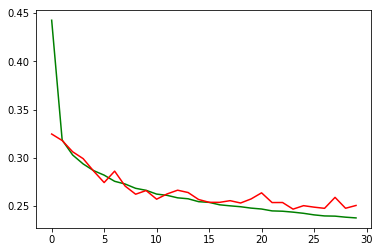

In [25]:

plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')